In [10]:
import numpy as np
import requests
from io import StringIO
from datetime import timedelta, datetime
from matplotlib.ticker import FormatStrFormatter
import matplotlib.font_manager as fm
from functions_evaluation import *
font_path = "font-folder/Roboto-Regular.ttf"
font_path_bold = "font-folder/Roboto-Bold.ttf"
font_prop = fm.FontProperties(fname=font_path, size=18)  # Imposta la dimensione
font_prop_legend = fm.FontProperties(fname=font_path, size=16)
font_prop_title = fm.FontProperties(fname=font_path_bold, size=26)
import matplotlib as mpl
mpl.rcParams['font.family'] = font_prop.get_name()
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Loading surveillance data: last surveillance file
df_surv = pd.read_csv("../../../input_data/target-hospital-admissions_2024-04-27.csv")
df_surv.rename(columns={'date': 'target_end_date'}, inplace=True)
df_surv['target_end_date'] = pd.to_datetime(df_surv['target_end_date'])
df_surv

,target_end_date,location,location_name,hospitalizations,weekly_rate,horizon
0,2023-11-04,US,US,1974,0.594220,9
1,2023-11-11,US,US,2695,0.811258,10
2,2023-11-18,US,US,3422,1.030102,11
3,2023-11-25,US,US,4240,1.276339,12
4,2023-12-02,US,US,5752,1.731487,13
5,2023-12-09,US,US,7178,2.160746,14
6,2023-12-16,US,US,9886,2.975918,15
7,2023-12-23,US,US,15134,4.555688,16
8,2023-12-30,US,US,21030,6.330523,17
9,2024-01-06,US,US,18938,5.700782,18


In [12]:
# Loading jaccard similarity index data
df_t0 = pd.read_csv("../output_data/persistence_analysis/Jaccard_index_t0_Ens2_S2_LOP_wmape.csv", index_col=0)
df_tprevious = pd.read_csv("../output_data/persistence_analysis/Jaccard_index_tprevious_Ens2_S2_LOP_wmape.csv", index_col=0)

In [13]:
df_t0['target_end_date'] = pd.to_datetime(df_t0.index)
df_tprevious['target_end_date'] = pd.to_datetime(df_tprevious.index)
df_t0_surv = pd.merge(df_t0, df_surv[['target_end_date', 'hospitalizations']], on='target_end_date', how='inner')
df_tprevious_surv = pd.merge(df_tprevious, df_surv[['target_end_date', 'hospitalizations']], on='target_end_date', how='inner')

Visualizing Jaccard Similarity Index for k=15,25,50

In [16]:
k_values = ['0.15', '0.25', '0.5']
colors = ['#2d7974', '#4da284', '#80c799']
markers_t0 = 'o'  # Circle marker for t0
markers_tprevious = '^'  # Triangle marker for tprevious
k_values_perc = [15, 25, 50]
color_hosp = 'grey'

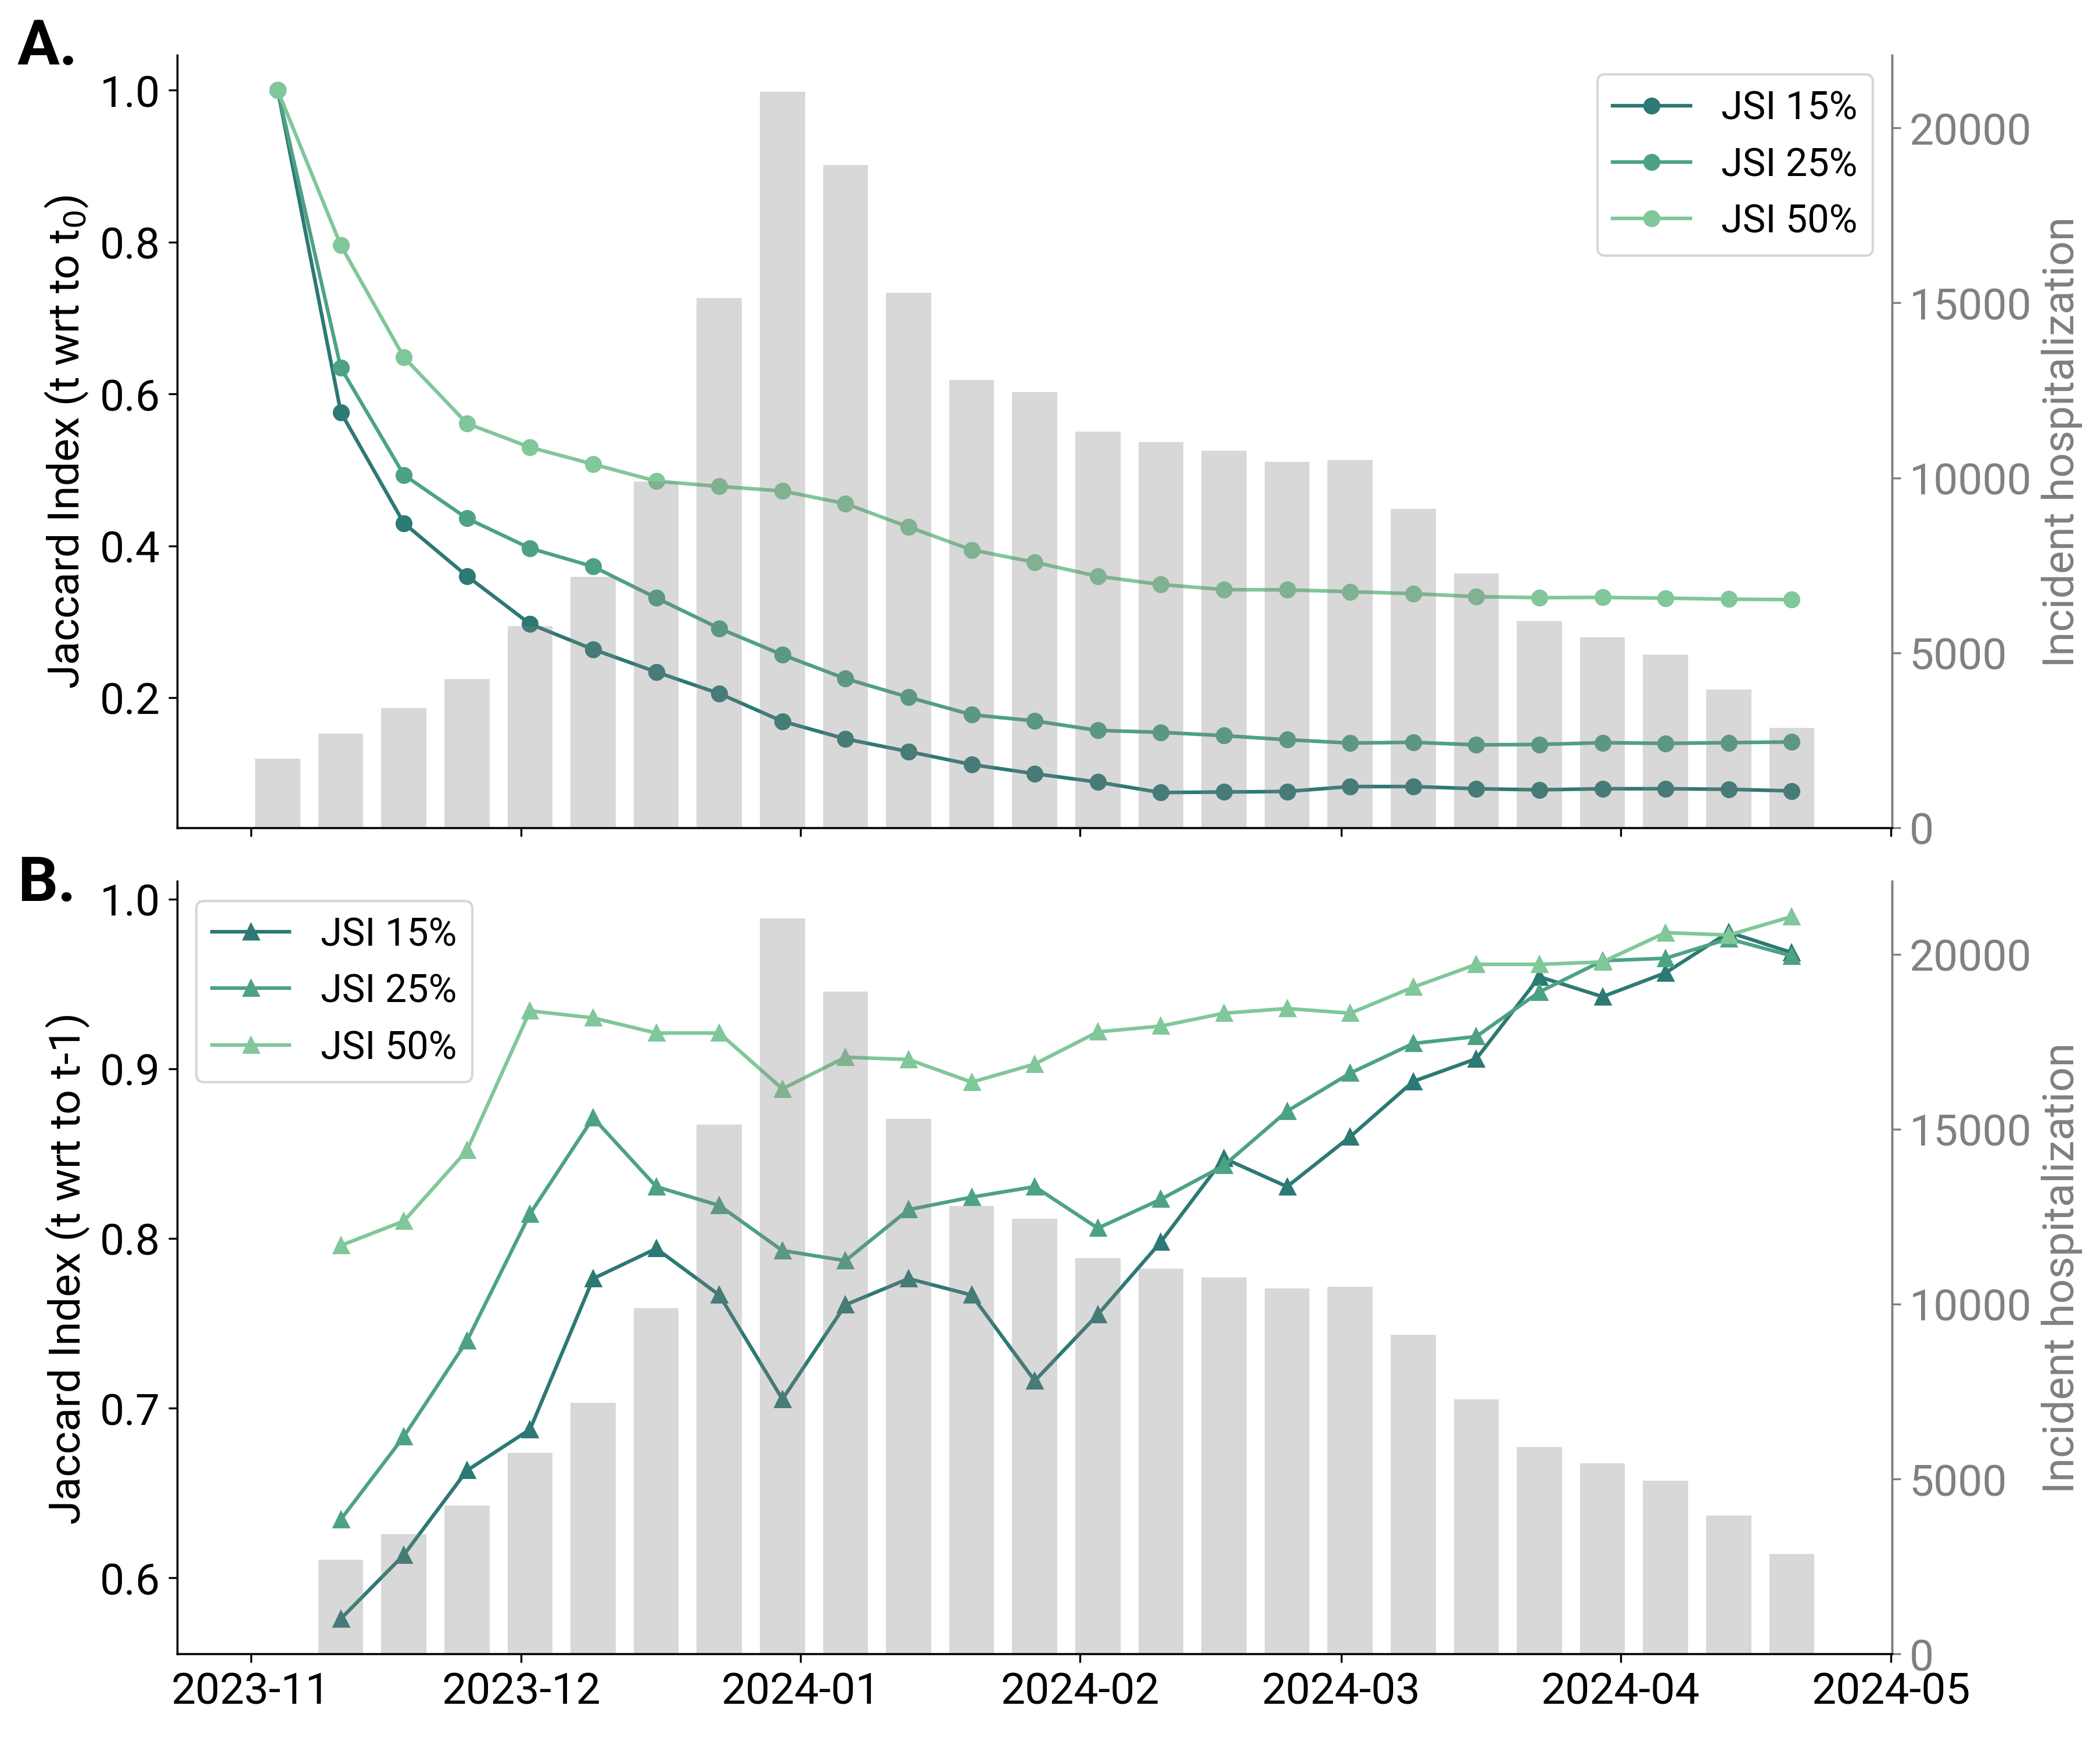

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10), dpi=300, sharex=True)

# ----------- FIRST SUBPLOT: t0 -----------
ax1 = axes[0]
ax1_twin = ax1.twinx()
for i, k in enumerate(k_values):
    ax1.plot(df_t0_surv.target_end_date, df_t0_surv[k], f'-{markers_t0}', color=colors[i], label=f'JSI {k_values_perc[i]}%')
ax1_twin.bar(df_t0_surv.target_end_date, df_t0_surv.hospitalizations, color=color_hosp, alpha=0.3, width=5)
ax1.set_ylabel('Jaccard Index (t wrt to t$_0$)', fontproperties=font_prop)
ax1_twin.set_ylabel('Incident hospitalization', color=color_hosp, fontproperties=font_prop)
ax1.legend(loc='upper right', prop = font_prop_legend)

# ------------ SECOND SUBPLOT: tprevious -----------
ax2 = axes[1]
ax2_twin = ax2.twinx()
for i, k in enumerate(k_values):
    ax2.plot(df_tprevious_surv.target_end_date, df_tprevious_surv[k], f'-{markers_tprevious}', color=colors[i], label=f'JSI {k_values_perc[i]}%')
ax2_twin.bar(df_tprevious_surv.target_end_date, df_tprevious_surv.hospitalizations, color=color_hosp, alpha=0.3, width=5)
ax2.set_xlabel(' ')
ax2.set_ylabel('Jaccard Index (t wrt to t-1)',  fontproperties=font_prop)
ax2_twin.set_ylabel('Incident hospitalization', color=color_hosp,  fontproperties=font_prop)
ax2.legend(loc='upper left', prop = font_prop_legend)
for ax in [ax1, ax2, ax1_twin, ax2_twin]:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(font_prop)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax1_twin.tick_params(axis='y', labelsize=18, colors = color_hosp)
ax2_twin.tick_params(axis='y', labelsize=18, colors = color_hosp)
ax1_twin.tick_params(axis='both', which='major', labelsize=18)
ax2_twin.tick_params(axis='both', which='major', labelsize=18)
for ax in [ax1, ax2, ax1_twin, ax2_twin]:
    ax.spines['top'].set_visible(False)
ax1_twin.spines['right'].set_edgecolor(color_hosp)
ax2_twin.spines['right'].set_edgecolor(color_hosp)
plt.tight_layout()
fig.text(0.0, 0.98, 'A.', font_properties=font_prop_title)
fig.text(0.0, 0.5, 'B.', font_properties=font_prop_title)
plt.show()
fig.savefig('../figures/jaccard_index_S2_LOP_supplementary.png', bbox_inches='tight')